# Import section

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Reading image

## RGB image

### We know that RGB images are made of 3 colors (red, green and blue)

### When we read a RGB image we are storing the values of all the 3 channel for each pixel. Therefore to store information about a single pixel we will be using a list of 3 values to store the channel values and to store information of all the pixels in the image we will be using a 2D numpy array.

### So a single image is represented as a 2D numpy array of list

### The first value from img.shape is height, second is width and 3rd is number of channels

In [2]:
img = cv.imread('image.jpg')
print(f'Size of the image represented as nparray: {img.shape}')
print(f'How single pixel is represented: {img[0, 0]}')
print(f'How entire image is represented: \n{img}')

Size of the image represented as nparray: (593, 626, 3)
How single pixel is represented: [154 131 115]
How entire image is represented: 
[[[154 131 115]
  [155 132 116]
  [155 132 116]
  ...
  [139 108  85]
  [138 107  84]
  [138 107  84]]

 [[155 132 116]
  [155 132 116]
  [156 133 117]
  ...
  [139 108  85]
  [138 107  84]
  [138 107  84]]

 [[156 133 117]
  [156 133 117]
  [157 134 118]
  ...
  [138 107  84]
  [137 106  83]
  [137 106  83]]

 ...

 [[  4 162 246]
  [  2 162 246]
  [  5 163 247]
  ...
  [ 38  52  64]
  [ 34  46  56]
  [ 36  46  56]]

 [[  3 164 246]
  [  3 164 246]
  [  4 165 247]
  ...
  [ 36  48  58]
  [ 40  49  59]
  [ 42  49  58]]

 [[  7 169 251]
  [  7 169 251]
  [  7 169 251]
  ...
  [ 36  47  51]
  [ 36  47  51]
  [ 36  47  51]]]


## Gray images

### When we read black and white images we are in turn reading gray images as per to computer's understanding.

### Gray images do not have 3 channels like RGB, they only have 1 channel which denotes the intensity level of gray i.e. 0 being black and 255 being white.

In [3]:
bw_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(f'Size of the image represented as nparray: {bw_img.shape}')
print(f'How single pixel is represented: {bw_img[0, 0]}')
print(f'How entire image is represented: \n{bw_img}')

Size of the image represented as nparray: (593, 626)
How single pixel is represented: 129
How entire image is represented: 
[[129 130 130 ... 105 104 104]
 [130 130 131 ... 105 104 104]
 [131 131 132 ... 104 103 103]
 ...
 [169 169 170 ...  54  48  48]
 [170 170 171 ...  50  51  51]
 [175 175 175 ...  47  47  47]]


# Displaying image

In [4]:
cv.imshow('image',img)
cv.waitKey()
cv.destroyAllWindows()

# Color spaces

### RGB/BGR: red, green and blue
### HSV/HSL: hue, saturation and value/luminocity
### GRAY: gray image (black and white)

In [5]:
# for RGB to HSV and Gray conversion
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)               
cv.imshow('HSV image',hsv_img)
cv.waitKey()
cv.destroyAllWindows()

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray image',gray_img)
cv.waitKey()
cv.destroyAllWindows()

In [6]:
# for HSV or Gray to RGB conversion
hsv_rev = cv.cvtColor(hsv_img, cv.COLOR_HSV2BGR)
cv.imshow('HSV to RGB image',hsv_rev)
cv.waitKey()
cv.destroyAllWindows()

gray_rev = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)
cv.imshow('Gray to RGB image',gray_rev)
cv.waitKey()
cv.destroyAllWindows()

# by doing this conversion we won't be able to see color differnce between Gray and converted image as the cvtColor()
# function will create 3 channels but will subsiquently copy the gray intensity in each channel. we can see this by
# inspecting any individual pixel
print(gray_rev.shape)
print(gray_rev[0, 0])

(593, 626, 3)
[129 129 129]


# Channel splitting

## RBG channel splitting

In [7]:
b_channel, g_channel, r_channel = cv.split(img)
print(f'Size of B channel: {b_channel.shape}')
print(f'Size of R channel: {r_channel.shape}')
print(f'Size of G channel: {g_channel.shape}')

cv.imshow('Red channel',r_channel)
cv.imshow('Blue channel',b_channel)
cv.imshow('Green channel',g_channel)
cv.waitKey(0)
cv.destroyAllWindows()

# now we can see the images are displayed as grayscale images, this is because when we split the channels of an image we
# are essentially getting an image with single channel and a single channel image is considered as grayscale image, the 
# the value of each channel is preserved, we can check this by recombining the channels

# in cv.merge() function we need to pass a list of channel values i.e. list of list and the order of the list must be in
# B - G - R 

merge_img = cv.merge([b_channel, g_channel, r_channel])
cv.imshow('Merged image', merge_img)
cv.waitKey(0)
cv.destroyAllWindows()

Size of B channel: (593, 626)
Size of R channel: (593, 626)
Size of G channel: (593, 626)


## Enhancing particular channel(s) of an image

### The value we are adding with the channel should be <= 255, because that is the maximum pixel intensity value

In [8]:
enhanced_img = cv.merge([b_channel, g_channel + 50, r_channel])
cv.imshow('Green enhanced image', enhanced_img)
cv.waitKey(0)
cv.destroyAllWindows()

### To truely create split a channel from an image we can create a np array of zeros and merge it with channel which will make each pixel value as [0, 0, r_value] or [0, g_value, 0] or [b_value, 0, 0].

### In the cv.split() function we were getting only a single value from the pixel i.e. other channels were discarded and this was the reason due to which the channel images were displayed in grayscale.

### But by merging each channel indiviually with an array of zerors we are preserving the other 2 channels also and displaying only the specifed channel.

### Make sure to add dtype parameter in np.zeros() function because by default it creates an array of float i.e. 0.0, we need array to be of type int as the splitted channel will be of int type.

In [9]:
zero_arr = np.zeros(img.shape[:2], dtype = 'uint8')

b_channel = cv.merge([zero_arr, zero_arr, b_channel])
g_channel = cv.merge([zero_arr, g_channel, zero_arr])
r_channel = cv.merge([r_channel, zero_arr, zero_arr]) 

cv.imshow('Red channel',r_channel)
cv.imshow('Blue channel',b_channel)
cv.imshow('Green channel',g_channel)
cv.waitKey(0)
cv.destroyAllWindows()

## HSV channel splitting

In [10]:
h_channel = hsv_img[:,:, 0]
s_channel = hsv_img[:,:, 1]
v_channel = hsv_img[:,:, 2]

cv.imshow('Hue channel',h_channel)
cv.imshow('Saturartion channel',s_channel)
cv.imshow('Value channel',v_channel)
cv.waitKey(0)
cv.destroyAllWindows()

# Histogram representation

## Histograms are a great way to visualise individual color components

### Method 1 : plt.hist(image, bins, range)
- image : it is the source image for which the histogram has to be plotted, the image should be of 1-dimension i.e. it should be flattened, it can be done by np.flatten() .
- bins : histograms are plotted in form of bins, values on x-axis in a histogram are plotted in form of bars. Bins are the no. of bars which are to be plotted. In our image we have values ranging from 0 to 255 i.e. 256 values, by providing bins we can group certain range of values, if we give 16 as bins value then there will be 16 distinct bars and each bar will correspond to a combination of 16 values i.e. [0, 15] or [16, 31] or [32, 47] ... [240, 255]. 
<br><br><br>
<center>Value of each bin = $\frac{\text{highest  bound of range}} {\text{total no. of bins}}$ </center>
<br><br>
- range : it specifies the range of values to be plotted in the histogram, for our a 8-bit image range will be [0, 256] (values from 0 to 255 will be considered here, excluding 256). 

### Method 2 : cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
- images : it is the source image of type uint8 or float32 represented as “[img]”.
- channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask : mask image. To find histogram of full image, it is given as “None”.
- histSize : this represents our BIN count. For full scale, we pass [256].
- ranges : this is our RANGE. Normally, it is [0,256].

using matplotlib


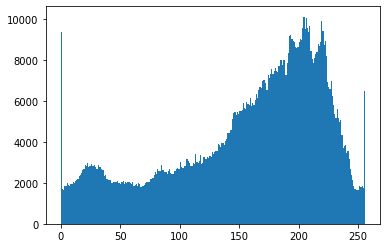

using OpenCV


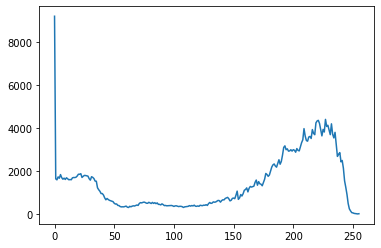

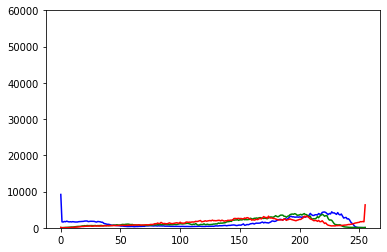

In [11]:
img = cv.imread('image.jpg')

color = ('b', 'g', 'r')
# method 1: using matplotlib 
# the problem with this method is that it plota histogram for only the blue channel, because it is the first channel and
# the rest are ignored
print('using matplotlib')
plt.hist(img.flatten(), 256,[0,256])
plt.show()

# method 2: using OpenCV
# this is for a single channel
print('using OpenCV')
histogram = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.show()

# ploting histogram for all channel in a single plot
for i,col in enumerate(color):
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    plt.ylim([0, 60000])
    
plt.show()